In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("train.csv")
df1=pd.read_csv("test.csv")

In [4]:
df.shape, df1.shape

((9557, 143), (23856, 142))

In [5]:
df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [6]:
df1.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


## Working on Traing Data

In [7]:
df.head(2)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.0,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.0,64.0,144.0,4489,4


In [8]:
output_variable=df["Target"]

Text(0.5, 1.0, 'Biasness')

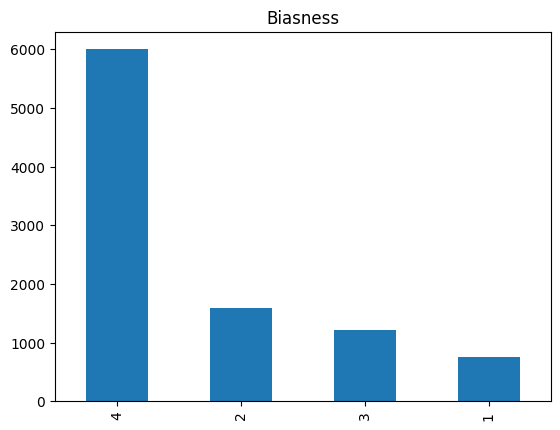

In [9]:
output_variable.value_counts().plot(kind="bar")
plt.title("Biasness")

### Data is more biased towards 4

In [9]:
cat_col = [feature for feature in df.columns if df[feature].dtype == "object"]

In [10]:
cat_col

['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa']

In [11]:
df[cat_col].head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


- The dependency, edjefe and edjefa columns his having yes and no value that why it cosidered as categorical columns

In [12]:
# Replacing No with 0 and yes with the median value
df.loc[df['edjefa'] == 'no', 'edjefa'] = 0
df.loc[df['edjefa'] == 'yes', 'edjefa'] = df[df['edjefa'] != 'yes']['edjefa'].astype('float').median()

In [13]:
df.loc[df['edjefe'] == 'no', 'edjefe'] = 0
df.loc[df['edjefe'] == 'yes', 'edjefe'] = df[df['edjefe'] != 'yes']['edjefe'].astype('float').median()

In [14]:
df["dependency"]=df["dependency"].replace({"yes" : 1 , "no" : 0}).astype(np.float64)

In [15]:
cat_col = [feature for feature in df.columns if df[feature].dtype == "object"]
cat_col

['Id', 'idhogar', 'edjefe', 'edjefa']

In [16]:
num_col = [feature for feature in df.columns if df[feature].dtype != "object"]

In [17]:
df[cat_col].head()

,Id,idhogar,edjefe,edjefa
0,ID_279628684,21eb7fcc1,10,0
1,ID_f29eb3ddd,0e5d7a658,12,0
2,ID_68de51c94,2c7317ea8,0,11
3,ID_d671db89c,2b58d945f,11,0
4,ID_d56d6f5f5,2b58d945f,11,0


### Missing Values

In [18]:
mis_val = []

for feature in df.columns:
    if df[feature].isnull().sum()>0:
        mis_val.append(feature)
        

In [19]:
df[mis_val].isnull().sum()

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

## Missing Values column : v2a1 ( Monthly rent payment), Missing Values : 6860

- there are some columns which affecting the column "v2a1", lets fetch them

In [20]:
col_for_v2a1 = [x for x in df.columns if x.startswith('tipo')]
df[col_for_v2a1].head()

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
0,0,0,1,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0


([<matplotlib.axis.XTick at 0x14940fc45e0>,
 [Text(0, 0, 'own and fully paid house'),
  Text(1, 0, 'own, paying in installment'),
  Text(2, 0, 'rented'),
  Text(3, 0, 'precarious'),
  Text(4, 0, 'other(assigned, borrowed)')])

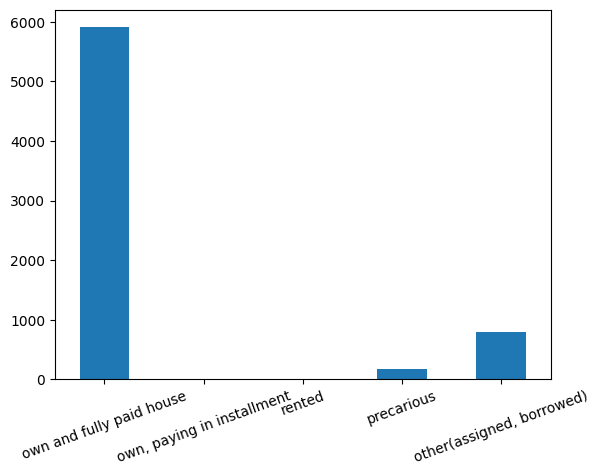

In [21]:
df.loc[df['v2a1'].isnull(), col_for_v2a1].sum().plot(kind="bar", linewidth=2)
plt.xticks([0,1,2,3,4], ["own and fully paid house","own, paying in installment", "rented", "precarious",
                         "other(assigned, borrowed)"], rotation=20)

- The most of missing values is from "own and fully paid up category. and on the other hand no missing values of the category "rented". which means we have to fill the nan vales with 0.

In [22]:
df["v2a1"]=df["v2a1"].fillna(0)

## Missing Values column : v18q1 ( number of tablets household owns), Missing Values : 7342

In [23]:
df["v18q1"].fillna(df["v18q1"].mode()[0], inplace=True)

## Missing Values column : rez_esc (Years behind in school), Missing Values : 7928

In [24]:
df["rez_esc"].fillna(df["rez_esc"].mode()[0], inplace=True)

## Missing Values column : meanedu (average years of education for adults (18+)), Missing Values : 5

In [25]:
col_for_meanedu=[feature for feature in df.columns if feature.startswith("inst")]

In [26]:
df[(df["meaneduc"].isnull()) & (df["age"]>18)][col_for_meanedu]

,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
2049,0,0,0,0,0,0,1,0,0
2050,0,0,0,0,0,0,1,0,0


In [27]:
df['meaneduc']=df["meaneduc"].fillna(0)

## Missing Values column : SQBmeanedu (square average years of education for adults (18+)), Missing Values : 5

In [28]:
df["SQBmeaned"]=df["meaneduc"]**2

In [29]:
df[mis_val].isnull().sum()

v2a1         0
v18q1        0
rez_esc      0
meaneduc     0
SQBmeaned    0
dtype: int64

#### Check whether all members of the house have the same poverty level.
#### Check if there is a house without a family head.

In [30]:
same_poverty = 0
no_family_head = 0

for idhogar in df['idhogar'].unique():
    if len(df[df['idhogar'] == idhogar]['Target'].unique()) == 1:
        same_poverty += 1
    if (df[df['idhogar'] == idhogar]['parentesco1'] == 0).all():
        no_family_head += 1

In [31]:
print('Family with the same poverty level:', same_poverty)
print('Family with the diff poverty level:', len(df['idhogar'].unique()) - same_poverty)
print('House without a Family head:', no_family_head)

Family with the same poverty level: 2903
Family with the diff poverty level: 85
House without a Family head: 15


# Working with Test Data

In [32]:
df1.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [33]:
cat_col = [feature for feature in df.columns if df[feature].dtype == "object"]
cat_col

['Id', 'idhogar', 'edjefe', 'edjefa']

In [34]:
df1.loc[df1['edjefa'] == 'no', 'edjefa'] = 0
df1.loc[df1['edjefa'] == 'yes', 'edjefa'] = df1[df1['edjefa'] != 'yes']['edjefa'].astype('float').median()

In [35]:
df1.loc[df1['edjefe'] == 'no', 'edjefe'] = 0
df1.loc[df1['edjefe'] == 'yes', 'edjefe'] = df1[df1['edjefe'] != 'yes']['edjefe'].astype('float').median()

In [36]:
df1["edjefa"]=df1["edjefa"].astype("float")
df1["edjefe"]=df1["edjefe"].astype("float")

In [37]:
mis_val = []

for feature in df1.columns:
    if df1[feature].isnull().sum()>0:
        mis_val.append(feature)
        

In [38]:
mis_val

['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']

In [39]:
df1["v18q1"].fillna(df1["v18q1"].mode()[0], inplace=True)

In [40]:
df1["v2a1"]=df1["v2a1"].fillna(0)

In [41]:
df1["rez_esc"].fillna(df1["rez_esc"].mode()[0], inplace=True)

In [42]:
df1['meaneduc']=df1["meaneduc"].fillna(0)

In [43]:
df1["SQBmeaned"]=df1["meaneduc"]**2

In [44]:
df1["dependency"]=df1["dependency"].replace({"yes" : 1 , "no" : 0}).astype(np.float64)

# Model

In [45]:
X_train = df.drop(columns=["Target", "Id", "idhogar"], axis=1)
y_train = output_variable
X_test = df1.drop(columns=["Id", "idhogar"], axis=1)

In [46]:
X_train.shape, X_test.shape, y_train.shape

((9557, 140), (23856, 140), (9557,))

### Scaling the dataset

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scalar=MinMaxScaler()

In [49]:
X_train_sc = pd.DataFrame(scalar.fit_transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(scalar.fit_transform(X_test), columns=X_test.columns)

### Check how much the dataset is imbalanced

<AxesSubplot: >

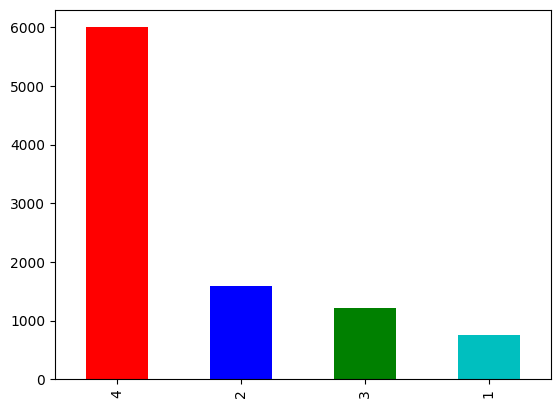

In [50]:
color=["r", "b", "g", "c"]
y_train.value_counts().plot(kind="bar", color=color)

In [51]:
# Undersamling the data

In [52]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()

In [53]:
X_train_res, y_train_res = nm.fit_resample(X_train_sc, y_train)

In [54]:
X_train_res.shape, y_train_res.shape

((3020, 140), (3020,))

<AxesSubplot: >

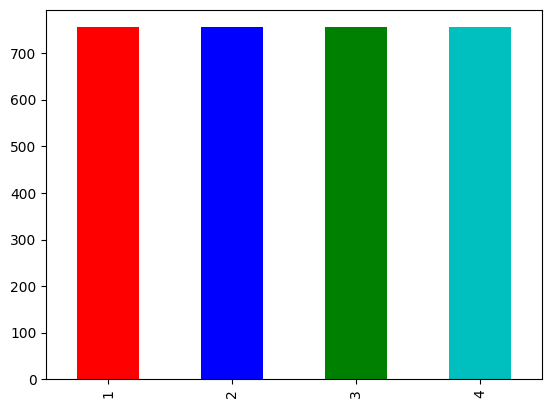

In [55]:
color=["r", "b", "g", "c"]
y_train_res.value_counts().plot(kind="bar", color=color)

## PCA

In [56]:
from sklearn.decomposition import PCA

In [57]:
PCA=PCA(n_components=50)

In [58]:
X_PCA = PCA.fit_transform(X_train_res)

In [59]:
# Variance explaind around 95%
PCA.explained_variance_ratio_.sum()

0.95679678904378

In [60]:
X_test_PCA = PCA.fit_transform(X_test_sc)

## Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf=RandomForestClassifier()

In [63]:
rf.fit(X_PCA, y_train_res)

RandomForestClassifier()

In [64]:
from sklearn.metrics import accuracy_score

yhat1=rf.predict(X_PCA)
yhat=rf.predict(X_test_PCA)

print("Accuracy : ", accuracy_score(y_train_res, yhat1))

Accuracy :  1.0


## Cross_validation

In [65]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(rf, X_PCA, y_train_res, cv=10)
print('Accuracy after cross validation: ', cv_score.mean())

Accuracy after cross validation:  0.6241721854304635
